# Bayesian Gaussian Mixture

```{note}
In BayesianGaussianMixture, cluster parameters are treated as random variables instead of fixed numbers.

Latent variables $\mathbf{z}$ now includes both the cluster parameters and the cluster assignments.
```

## Examples

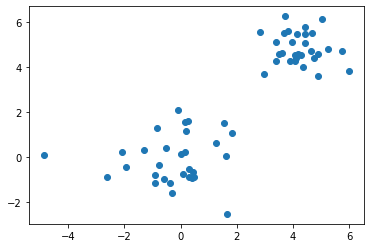

In [1]:
"""
manual dataset
"""
import numpy as np
import matplotlib.pyplot as plt

X = np.vstack((np.random.multivariate_normal([0, 0], [[2, 0], [0, 1]], 30), 
               np.random.multivariate_normal([4, 5], [[1, 0], [0, 1]], 30)))
np.random.shuffle(X)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [2]:
from sklearn.mixture import BayesianGaussianMixture

# set n_components large enough
# set weight_concentration_prior small because we have a prior belief there are few clusters
bgm = BayesianGaussianMixture(n_components=10, n_init=10, weight_concentration_prior=0.01)
bgm.fit(X)

# give 0 weights to unnessary clusters
np.round(bgm.weights_, 2)

array([0.51, 0.49, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [3]:
X_predict = np.array([[2, 2], [4, 3]])
bgm.predict(X_predict)

array([0, 1])

## Variational Inference

Bayes' theorem:

$$p(\mathbf{z}|\mathbf{X}) = \mbox{posterior} = \frac{\mbox{likelihood}\times\mbox{prior}}{\mbox{evidence}} = \frac{p(\mathbf{X}|\mathbf{z})p(\mathbf{z})}{p(\mathbf{X})}$$

Unfortunately, the evidence $p(\mathbf{X})$ is often intractable:

$$p(\mathbf{X}) = \int{p(\mathbf{X}|\mathbf{z})p(\mathbf{z})}d{\mathbf{z}}$$

variational inference solves this intractability by picking a family of distribution $q(\mathbf{z};\boldsymbol{\lambda})$.

Then optimize $\boldsymbol{\lambda}$ to make $q(\mathbf{z})$ a good approximation of $p(\mathbf{z}|\mathbf{X})$.

This is achieved by finding the value of $\boldsymbol{\lambda}$ that minimizes the KL divergence from $q(\mathbf{z})$ to
$p(\mathbf{z}|\mathbf{X})$, noted $D_{KL}(q‖p)$.

$$
\begin{equation}
\begin{split}
D_{KL}(q‖p) =& \mathbb{E}_{q}\left[\log\frac{q(\mathbf{z})}{p(\mathbf{z}|\mathbf{X})}\right]\\
=& \mathbb{E}_{q}\left[\log{q(\mathbf{z})} - \log{p(\mathbf{z}, \mathbf{X})} + \log{p(\mathbf{X})}\right]\\
=& \log{p(\mathbf{X})} - \mbox{ELBO}(\mathbf{X};q)
\end{split}
\end{equation}
$$

Minimizing the KL divergence just requires maximizing the ELBO.

In practice, there are different techniques to maximize the ELBO. 

E.g *mean field variational inference* and *black box stochastic variational inference(BBSVI)*.